In [1]:
import tensorflow as tf
from tensorflow import keras

In [2]:
fashion_mnist = tf.keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

LABEL : 9

IMAGE PIXEL ARRAY:
 [[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0   0   1   4   0   0   0   0   1   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62  54   0   0   0   1   3   4   0   0   3]
 [  0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134 144 123  23   0   0   0   0  12  10   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 236 207 178 107 156 161 109  64  23  77 130  72  15]
 [  0   0   0   0   0   0   0   0   0   0   0   1   0  69 207 223 218 216 216 163 127 121 122 146 141  88 172  66]
 [  0   0   0   0   0   0   0   0   0   1   1   1

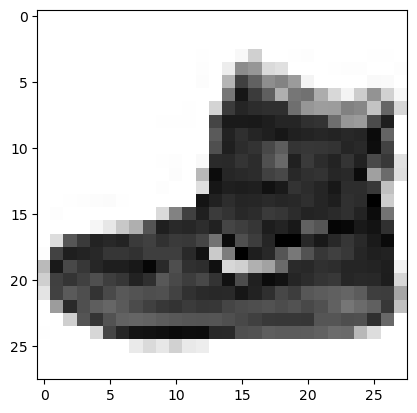

In [3]:
import numpy as np
import matplotlib.pyplot as plt

index = 0

np.set_printoptions(linewidth=320)

print(f'LABEL : {train_labels[index]}')
print(f'\nIMAGE PIXEL ARRAY:\n {train_images[index]}')

plt.imshow(train_images[index], cmap='Greys')

In [4]:
train_images = train_images/255.0
test_images = test_images/255.0

In [5]:
model = keras.Sequential([
    keras.layers.Flatten(),
    keras.layers.Dense(128, activation = tf.nn.relu),
    keras.layers.Dense(10, activation = tf.nn.softmax)
])

In [6]:
class myCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        if logs.get('loss') < 0.4:
            print("\nReached 60% accuracy so cancelling training!")
            self.model.stop_training = True

myCallback = myCallback()

In [7]:

model.compile(optimizer = tf.optimizers.Adam(),
              loss = 'sparse_categorical_crossentropy',
              metrics = ['accuracy'])

model.fit(train_images, train_labels, epochs=5, callbacks=[myCallback])

Epoch 1/5
1875/1875 [==============================] - 14s 7ms/step - loss: 0.4941 - accuracy: 0.8251
Epoch 2/5
1870/1875 [============================>.] - ETA: 0s - loss: 0.3688 - accuracy: 0.8674
Reached 60% accuracy so cancelling training!
1875/1875 [==============================] - 14s 8ms/step - loss: 0.3690 - accuracy: 0.8673


In [8]:
model.evaluate(test_images, test_labels)

313/313 [==============================] - 2s 7ms/step - loss: 0.4007 - accuracy: 0.8541


[0.4006901979446411, 0.8540999889373779]

In [10]:
print("Num GPUs Available: ", len(tf.config.experimental.list_physical_devices('GPU')))

Num GPUs Available:  1
